In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/spend.csv
/kaggle/input/Repayment.csv
/kaggle/input/Customer Acqusition.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
cust=pd.read_csv('../input/Customer Acqusition.csv')
rep=pd.read_csv('../input/Repayment.csv')
sp=pd.read_csv('../input/spend.csv')

In [7]:
cust.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [8]:
rep.head(2)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN


In [9]:
sp.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


### The data

In [10]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
No          100 non-null int64
Customer    100 non-null object
Age         100 non-null int64
City        100 non-null object
Product     100 non-null object
Limit       100 non-null float64
Company     100 non-null object
Segment     100 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [11]:
cust.drop(columns=['No'],inplace=True)   #S.No columns not needed, since we would be merging datasets

In [12]:
cust.describe()

,Age,Limit
count,100.000000,100.000000
mean,46.490000,284700.610000
std,18.282572,218494.967852
min,12.000000,10000.000000
25%,33.750000,100000.000000
50%,46.500000,300001.500000
75%,60.250000,500000.000000
max,79.000000,500000.000000


In [13]:
cust.select_dtypes(include=['object']).describe()

,Customer,City,Product,Company,Segment
count,100,100,100,100,100
unique,100,8,3,41,5
top,A68,COCHIN,Gold,C19,Govt
freq,1,20,38,4,29


In [14]:
cust['Limit'].value_counts()

500000.0    50
100000.0    12
100003.0     7
10002.0      7
100002.0     7
100001.0     7
10001.0      5
10000.0      5
Name: Limit, dtype: int64

* Limit is also categorical variable, and takes 8 distinct values.

* Hence, in cust dataset, age is the only numeric variable.

In [15]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
Sl No:      1500 non-null int64
Customer    1500 non-null object
Month       1500 non-null object
Type        1500 non-null object
Amount      1500 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [16]:
#renaming to differentiate month and amount columns from those of repay dataset, here month is spent month and amount is spent amount
sp.rename(columns={'Month':'spent_month','Amount':'spent_amount'},inplace=True)

In [17]:
sp['spent_month'].tail()

1495     4-Feb-06
1496    25-Mar-06
1497    31-Mar-06
1498    23-Mar-06
1499    24-Mar-06
Name: spent_month, dtype: object

A carefull look at spent month shows that the first element in the date is the day, followed by the month and then the year.

In [18]:
sp['spent_month']=pd.to_datetime(sp['spent_month'],dayfirst=True,yearfirst=False)

In [19]:
sp.drop(columns=['Sl No:'],inplace=True)  #Sl No: column not needed, since we would be merging the dataset

In [20]:
rep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
SL No:        1499 non-null float64
Customer      1500 non-null object
Month         1500 non-null object
Amount        1500 non-null float64
Unnamed: 4    0 non-null float64
dtypes: float64(3), object(2)
memory usage: 59.6+ KB


* This dataset has lots of missing values.

* The column "Unnamed: 4" is entirely null.

In [21]:
rep.drop(columns=['SL No:','Unnamed: 4'],inplace=True)  #SL No: also not needed

In [22]:
#renaming to differentiate from spent amount and spent month
rep.rename(columns={'Month':'repay_month','Amount':'repay_amount'},inplace=True)

In [23]:
rep[rep.isnull().any(axis=1)]  #all observations from 1500 to 1523 contain null.

,Customer,repay_month,repay_amount
1500,NaN,NaN,NaN
1501,NaN,NaN,NaN
1502,NaN,NaN,NaN
1503,NaN,NaN,NaN
1504,NaN,NaN,NaN
1505,NaN,NaN,NaN
1506,NaN,NaN,NaN
1507,NaN,NaN,NaN
1508,NaN,NaN,NaN
1509,NaN,NaN,NaN


In [24]:
rep=rep.iloc[0:1500]  #all observations from 1500 to 1523 contain null. hence we require obs till 1500 only, drop rest.

check for customer

In [ ]:
#cust_checker
#rep['cust_checker']=rep.Customer       # to check whether repay dataset were concatted with correct, respective customers

In [ ]:
#rep['repay_month'].tail()

In [25]:
# here also first element of the date is day followed by month & then year

rep['repay_month']=pd.to_datetime(rep['repay_month'],dayfirst=True, yearfirst=False)

In [26]:
rep.info()  #to check all nulls removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
Customer        1500 non-null object
repay_month     1500 non-null datetime64[ns]
repay_amount    1500 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 35.3+ KB


In [27]:
print(cust.shape)
print(sp.shape)

(100, 7)
(1500, 4)


In [28]:
print(cust.head(2))
print('\n\n',sp.head(2))

  Customer  Age       City Product     Limit Company        Segment
0       A1   76  BANGALORE    Gold  500000.0      C1  Self Employed
1       A2   71   CALCUTTA  Silver  100000.0      C2   Salaried_MNC


   Customer spent_month       Type  spent_amount
0       A1  2004-01-12  JEWELLERY     485470.80
1       A1  2004-01-03      PETRO     410556.13


In [29]:
data_1=pd.merge(left=cust,right=sp,on='Customer',how='right')

In [30]:
data_1.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,spent_month,Type,spent_amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13


In [31]:
rep.head(2)

,Customer,repay_month,repay_amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02


In [ ]:
#alternative to concat, but "TYPE" is duplicated

#beta_data=pd.merge(left=data_1,right=rep,left_on=['Customer','spent_month'],right_on=['Customer','repay_month'],how='outer')

In [32]:
data_1.sort_values(by='Customer',inplace=True,ascending=True)
rep.sort_values(by='Customer',inplace=True,ascending=True)
rep.reset_index(drop=True,inplace=True)

#concat rep dataset and data_1 dataset, along common "Customers", this allows to avoid duplication, it also concats repay data with repective customers
# use cust_checker to verify
alpha_data=pd.concat([data_1.set_index('Customer'),rep.set_index('Customer')],axis=1)

In [33]:
alpha_data.head(2)

,Age,City,Product,Limit,Company,Segment,spent_month,Type,spent_amount,repay_month,repay_amount
Customer,,,,,,,,,,,
A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-12,495414.75
A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-02-23,CLOTHES,476702.09,2005-02-23,96670.70


### 1.a

In [39]:
alpha_data[alpha_data.index=='A14'].head(1)   #customer A14 is aged 16

,Age,City,Product,Limit,Company,Segment,spent_month,Type,spent_amount,repay_month,repay_amount
Customer,,,,,,,,,,,
A14,16,BANGALORE,Gold,500000.0,C14,Salaried_Pvt,2005-02-01,SHOPPING,463680.6,2004-05-05,326909.73


In [40]:
#mean age
alpha_data.Age.mean()

44.26866666666667

In [41]:
cond=alpha_data.Age>18
alpha_data.Age.where(cond,44,inplace=True)   #Dataframe.where() replaces wherever condition is False

In [42]:
#checker for above
alpha_data[alpha_data.index=='A14'].head(1)   #customer A14's age changed

,Age,City,Product,Limit,Company,Segment,spent_month,Type,spent_amount,repay_month,repay_amount
Customer,,,,,,,,,,,
A14,44,BANGALORE,Gold,500000.0,C14,Salaried_Pvt,2005-02-01,SHOPPING,463680.6,2004-05-05,326909.73


### 1.b

In [43]:
cond2=alpha_data['spent_amount']<alpha_data['Limit']

In [ ]:
cond2

In [44]:
alpha_data['spent_amount'].where(cond2,(alpha_data['Limit']/2),inplace=True)

In [45]:
alpha_data.tail(3)

,Age,City,Product,Limit,Company,Segment,spent_month,Type,spent_amount,repay_month,repay_amount
Customer,,,,,,,,,,,
A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.0,2004-01-12,121874.90
A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.5,2004-01-03,337815.57
A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.0,2004-01-15,25682.73


### 1.c

In [ ]:
#randomly selecting observations for verification
#alpha_data.iloc[604:610]  

In [46]:
cond3=alpha_data['repay_amount']<alpha_data['Limit']

In [47]:
alpha_data.repay_amount.where(cond3,alpha_data["Limit"],inplace=True)

In [48]:
#checker for above randomly selected data
alpha_data.iloc[604:610]

,Age,City,Product,Limit,Company,Segment,spent_month,Type,spent_amount,repay_month,repay_amount
Customer,,,,,,,,,,,
A33,19,BOMBAY,Platimum,10002.0,C15,Salaried_MNC,2004-01-03,PETRO,5001.0,2005-05-09,10002.00
A33,19,BOMBAY,Platimum,10002.0,C15,Salaried_MNC,2006-11-21,FOOD,5001.0,2006-03-31,10002.00
A33,19,BOMBAY,Platimum,10002.0,C15,Salaried_MNC,2006-10-03,JEWELLERY,5001.0,2006-05-10,10002.00
A33,19,BOMBAY,Platimum,10002.0,C15,Salaried_MNC,2006-04-03,PETRO,5001.0,2006-03-29,10002.00
A33,19,BOMBAY,Platimum,10002.0,C15,Salaried_MNC,2006-02-04,JEWELLERY,5001.0,2005-02-28,10002.00
A33,19,BOMBAY,Platimum,10002.0,C15,Salaried_MNC,2005-05-28,JEWELLERY,5001.0,2004-09-13,2273.98


### 2.a

In [51]:
c=alpha_data.index.unique()
print(c)
print(len(c))

Index(['A1', 'A10', 'A100', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17',
       'A18', 'A19', 'A2', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26',
       'A27', 'A28', 'A29', 'A3', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35',
       'A36', 'A37', 'A38', 'A39', 'A4', 'A40', 'A41', 'A42', 'A43', 'A44',
       'A45', 'A46', 'A47', 'A48', 'A49', 'A5', 'A50', 'A51', 'A52', 'A53',
       'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A6', 'A60', 'A61', 'A62',
       'A63', 'A64', 'A65', 'A66', 'A67', 'A68', 'A69', 'A7', 'A70', 'A71',
       'A72', 'A73', 'A74', 'A75', 'A76', 'A77', 'A78', 'A79', 'A8', 'A80',
       'A81', 'A82', 'A83', 'A84', 'A85', 'A86', 'A87', 'A88', 'A89', 'A9',
       'A90', 'A91', 'A92', 'A93', 'A94', 'A95', 'A96', 'A97', 'A98', 'A99'],
      dtype='object', name='Customer')
100


As clear from above, there are 100 unique customers, from A1-A99 in the given dataset.

### 2.b

In [52]:
alpha_data.select_dtypes('object').describe()

,City,Product,Company,Segment,Type
count,1500,1500,1500,1500,1500
unique,8,3,41,5,15
top,BANGALORE,Gold,C22,Normal Salary,PETRO
freq,299,610,103,441,200


From above, City, Product, Company, Segment, Type are different categorical vars in the dataset. 

* 8 different Cities, with Banglore having max freq.

* 3 different Products, with GOLD having max freq.

* 41 different Companies, with C22 having max freq.

* 5 different Segment, with Normal having max freq.

* 15 different Types, with PETRO having max freq.

### 2.c

In [55]:
#avg monthly spend

avg_sp=alpha_data[['spent_month','spent_amount']]
avg_sp['spent_month']=avg_sp.spent_month.apply(lambda g:g.month)
avg_sp

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,spent_month,spent_amount
Customer,,
A1,1,485470.80
A1,2,476702.09
A1,1,394970.96
A1,4,176372.82
A1,2,155611.91
A1,10,244534.68
A1,8,344372.10
A1,11,183839.61
A1,4,346925.68


In [56]:
avg_sp.groupby('spent_month').agg({'spent_amount':'mean'})

,spent_amount
spent_month,
1,147770.183266
2,151261.565126
3,131840.761861
4,135035.927333
5,151623.982190
6,182037.731429
7,166326.817857
8,165759.596190
9,141131.704524


### 2.d

In [57]:
avg_rep=alpha_data[['repay_month','repay_amount']]
avg_rep['repay_month']=avg_rep.repay_month.apply(lambda j:j.month)
avg_rep

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,repay_month,repay_amount
Customer,,
A1,1,495414.75
A1,2,96670.70
A1,4,429099.97
A1,1,453027.64
A1,9,186427.50
A1,2,187398.64
A1,7,297176.74
A1,11,169358.40
A1,11,402099.78


In [58]:
avg_rep.groupby('repay_month').agg({'repay_amount':'mean'})

,repay_amount
repay_month,
1,163445.534263
2,158873.098158
3,156430.854155
4,167676.814933
5,186097.903985
6,114146.549375
7,165203.918980
8,152817.425510
9,129345.768500


### 2.e

In [59]:
#given that, profit earned = 2.9% of monthly profit, where monthly profit=repay amt - spent amt

ym_df=alpha_data[['repay_amount','spent_amount','repay_month']].copy()
ym_df['yr']=ym_df.repay_month.apply(lambda x:x.year)
ym_df['month']=ym_df.repay_month.apply(lambda x:x.month)
ym_df.drop(columns=['repay_month'],inplace=True)

pr_df=ym_df.groupby(['yr','month']).agg({'repay_amount':sum,'spent_amount':sum}) #group based on year & months, calculate monthly profit for diff. years
pr_df['monthly_profit']=pr_df.repay_amount-pr_df.spent_amount

condition=pr_df.repay_amount<pr_df.spent_amount
pr_df['bank_profit']=pr_df.monthly_profit.where(condition,(((2.9/100)*(pr_df.monthly_profit))).round(2)).copy()
condition2=pr_df.bank_profit>0
pr_df['bank_profit'].where(condition2,0,inplace=True)     #no bank profits where monthly profits are negative, hence setting them to 0
pr_df[['monthly_profit','bank_profit']]

monthly_profit  bank_profit
yr   month                             
2004 1          3767600.73    109260.42
     2          -777194.07         0.00
     3           348693.67     10112.12
     4          1403932.85     40714.05
     5           140550.22      4075.96
     9          -576173.42         0.00
     11           99031.84      2871.92
2005 1           -44295.03         0.00
     2          2733327.45     79266.50
     4           220412.40      6391.96
     5          4812240.59    139554.98
     6           143324.46      4156.41
     7            88031.79      2552.92
     8           566584.99     16430.96
     9          -179546.69         0.00
     10          540628.87     15678.24
     11          747295.97     21671.58
     12          665283.90     19293.23
2006 1           -16721.98         0.00
     2          1625598.02     47142.34
     3          2651514.00     76893.91
     4          3607171.12    104607.96
     5           409951.48     11888.59
     6            -4747.26         0.00
     7          1263756.49     36648.94
     8           243274.15      7054.95
     9          1192610.59     34585.71
     10          827203.49     23988.90
     11        -1301843.28         0.00
     12            3777.52       109.55

### 2.f

In [60]:
alpha_data['Product'].value_counts()

Gold        610
Platimum    570
Silver      320
Name: Product, dtype: int64

Gold is the top product, with 610 customers followed by Platinum at 570 & Silver at 320 customer.

In [61]:
alpha_data['Type'].value_counts().iloc[0:5]

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

The above are the top 5 types on which customers spend:

* Petrol is the top product spent on, followed by Food, Camera, Air Ticket and Train ticket in order.

### 2.g

In [62]:
city_sp=alpha_data[['City','spent_amount']]
city_sp.head(3)

,City,spent_amount
Customer,,
A1,BANGALORE,485470.80
A1,BANGALORE,476702.09
A1,BANGALORE,394970.96


In [63]:
city_sp.groupby('City').agg({'spent_amount':sum}).sort_values(by='spent_amount',ascending=False)

,spent_amount
City,
COCHIN,45963513.50
CALCUTTA,41108132.30
BANGALORE,40461647.02
BOMBAY,28603127.38
CHENNAI,22128635.65
TRIVANDRUM,15337155.87
PATNA,15260586.97
DELHI,10918286.54


* COCHIN is the top spender

* Followed by Calcutta, Banglore, Bombay & Chennai in order.

### 2.h

In [64]:
age_sp=alpha_data[['Age','spent_amount']]
age_sp['age grp']=pd.cut(age_sp['Age'],bins=3,labels=['young','middle','old'])   #created bins for age, assigned young,middle,aged accordingly
age_sp

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,spent_amount,age grp
Customer,,,
A1,76,485470.80,old
A1,76,476702.09,old
A1,76,394970.96,old
A1,76,176372.82,old
A1,76,155611.91,old
A1,76,244534.68,old
A1,76,344372.10,old
A1,76,183839.61,old
A1,76,346925.68,old


In [65]:
age_sp.groupby('age grp').agg({'spent_amount':sum})

,spent_amount
age grp,
young,90019211.79
middle,80404537.04
old,49357336.40


From above, it is clear that the young are spending more money, followed by middle aged, then the old aged.

### 2.i

In [66]:
alpha_data.groupby('Customer').agg({'repay_amount':sum}).sort_values(by='repay_amount',ascending=False).iloc[0:11]

,repay_amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


Above are the top 10 customers in terms of repayment.

### 3.city wise spend on each product on yearly basis

In [67]:
df1=alpha_data[['City','Product','spent_month','spent_amount']]
df1['spent_yr']=df1.spent_month.apply(lambda l: l.year)

dn=df1.groupby(('City','Product','spent_yr')).agg({'spent_amount':sum})
dn.reset_index(inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  after removing the cwd from sys.path.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  


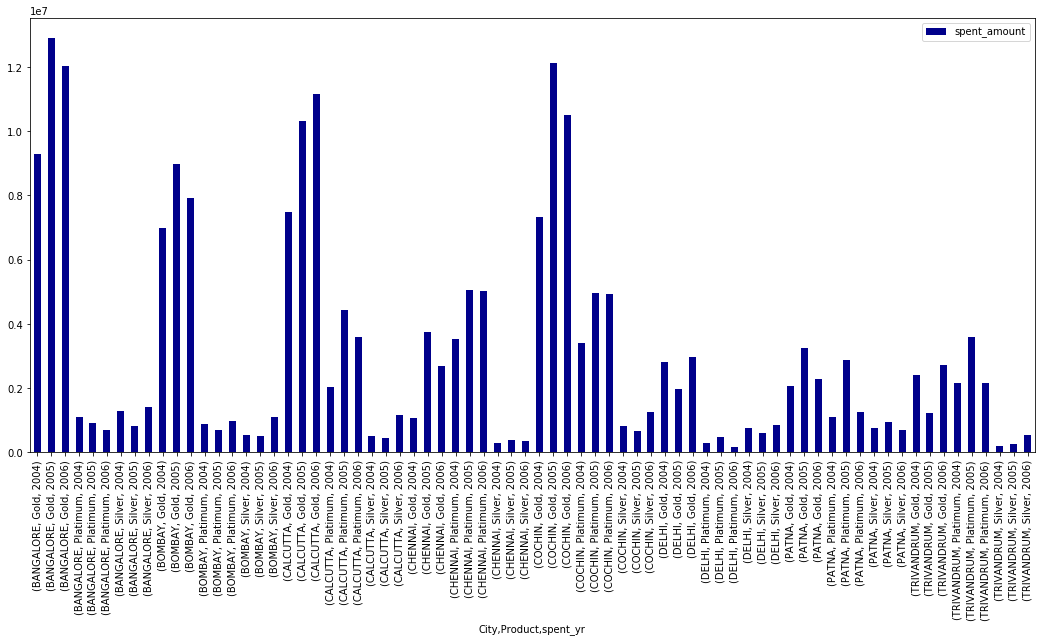

In [68]:
#plotting all in a single graph
ax=df1.groupby(('City','Product','spent_yr')).agg({'spent_amount':sum}).plot.bar(figsize=(18,8),color=('#00008B'))

In [69]:
#shortening the name of cities
dn.City.replace({'BANGALORE':'BLR','BOMBAY':'BOM','CALCUTTA':'CAL','CHENNAI':'CHN','COCHIN':'COC','DELHI':'DEL','PATNA':'PAT','TRIVANDRUM':'TRI'},inplace=True)

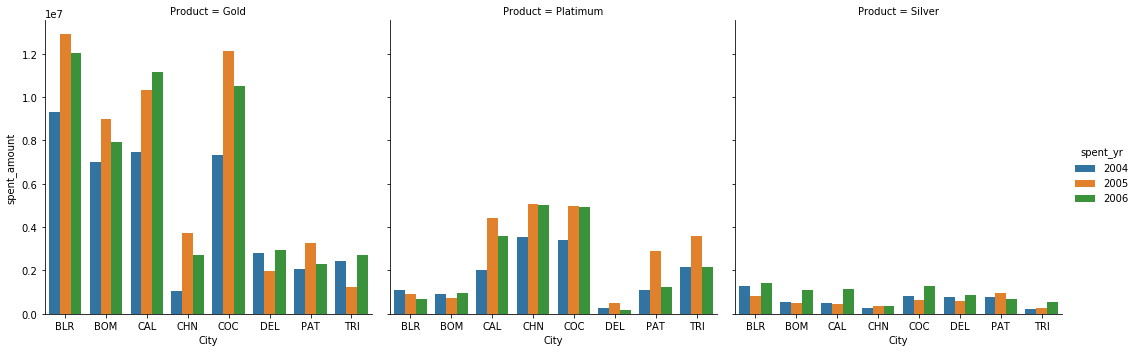

In [70]:
#using facet feature of seaborn through CATPLOT
g=sns.catplot(x='City',y='spent_amount',hue='spent_yr',col='Product',data=dn,kind='bar')

### 4.a

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


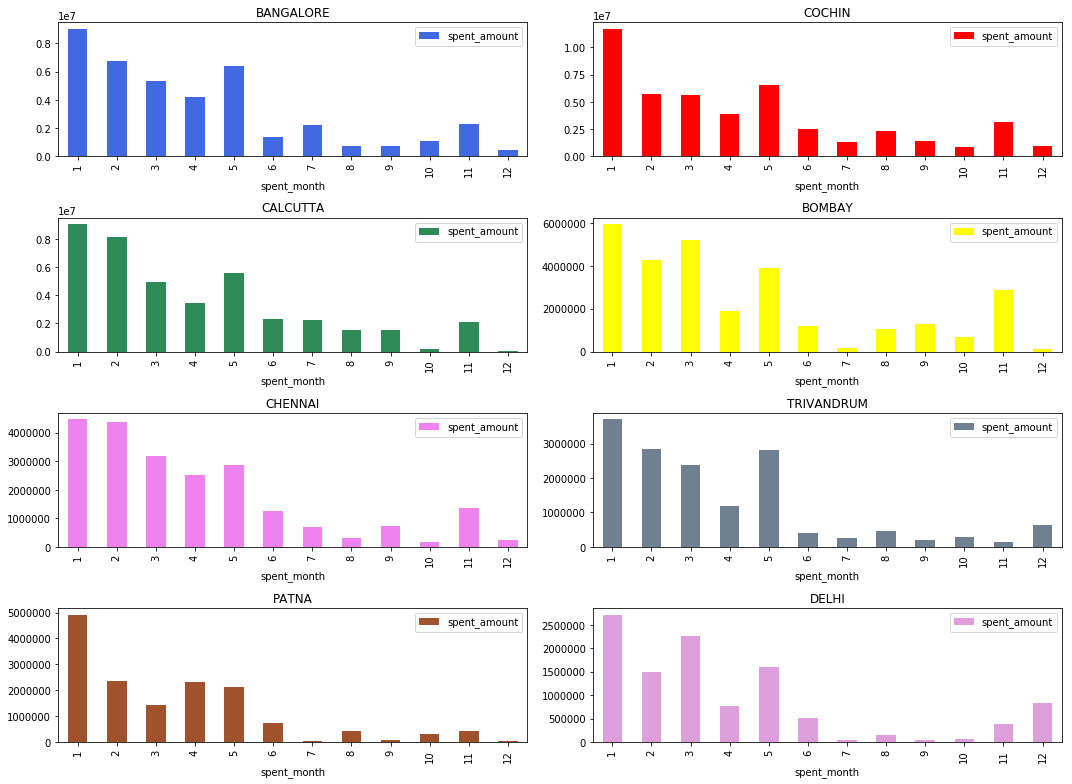

In [71]:
f,ax=plt.subplots(4,2,figsize=(15,11))
df2=alpha_data[['City','spent_amount','spent_month']]
df2['spent_month']=df2['spent_month'].apply(lambda o:o.month)


################################################## separate plot for each cities #############################

df2[df2.City=='BANGALORE'].groupby('spent_month').agg({'spent_amount':sum}).plot.bar(colors=('#4169E1'),ax=ax[0,0],title='BANGALORE')

df2[df2.City=='COCHIN'].groupby('spent_month').agg({'spent_amount':sum}).plot.bar(colors=('#FF0000'),ax=ax[0,1],title='COCHIN')

df2[df2.City=='CALCUTTA'].groupby('spent_month').agg({'spent_amount':sum}).plot.bar(colors=('#2E8B57'),ax=ax[1,0],title='CALCUTTA')

df2[df2.City=='BOMBAY'].groupby('spent_month').agg({'spent_amount':sum}).plot.bar(colors=('#FFFF00'),ax=ax[1,1],title='BOMBAY')

df2[df2.City=='CHENNAI'].groupby('spent_month').agg({'spent_amount':sum}).plot.bar(colors=('#EE82EE'),ax=ax[2,0],title='CHENNAI')

df2[df2.City=='TRIVANDRUM'].groupby('spent_month').agg({'spent_amount':sum}).plot.bar(colors=('#708090'),ax=ax[2,1],title='TRIVANDRUM')

df2[df2.City=='PATNA'].groupby('spent_month').agg({'spent_amount':sum}).plot.bar(colors=('#A0522D'),ax=ax[3,0],title='PATNA')

df2[df2.City=='DELHI'].groupby('spent_month').agg({'spent_amount':sum}).plot.bar(colors=('#DDA0DD'),ax=ax[3,1],title='DELHI')

plt.tight_layout()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  This is separate from the ipykernel package so we can avoid doing imports until


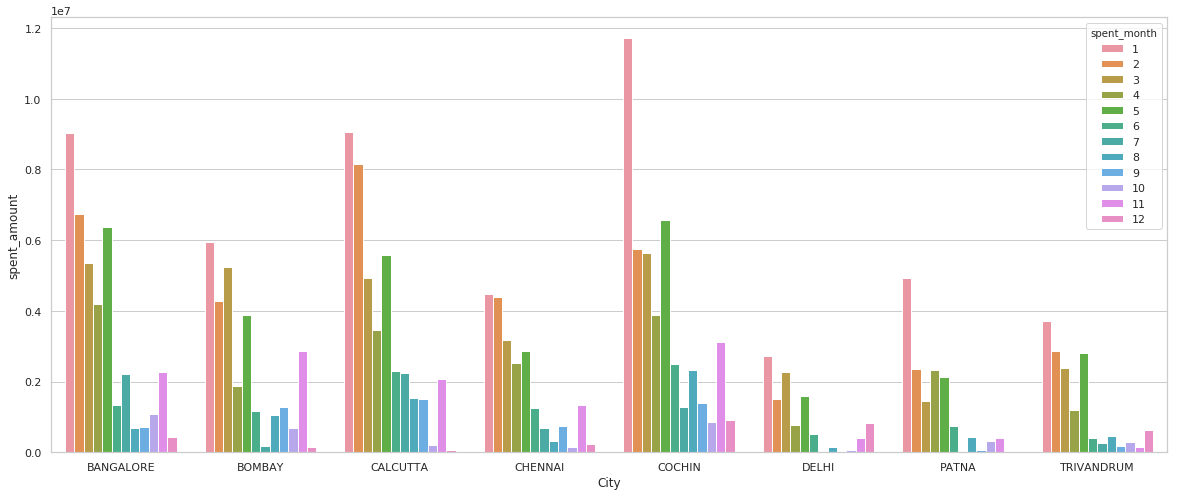

In [72]:
####################################### single plot for all locations-months ########################################

dfn=df2.groupby(('spent_month','City')).agg({'spent_amount':sum})
dfn.reset_index(inplace=True)
sns.set(style='whitegrid')
plt.figure(figsize=(20,8))
sns.barplot(x='City',y='spent_amount',hue='spent_month',data=dfn)

### 4.b

In [73]:
df3=alpha_data[['spent_amount','Type']]
df3['spent_yr']=alpha_data.spent_month.apply(lambda j:j.year)
s1=df3[df3.Type=='AIR TICKET'].groupby('spent_yr').agg({'spent_amount':sum}).sort_values(by='spent_amount',ascending=False)
s1.reset_index(inplace=True)
s1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,spent_yr,spent_amount
0,2005,10550152.21
1,2006,5248469.56
2,2004,4357225.35


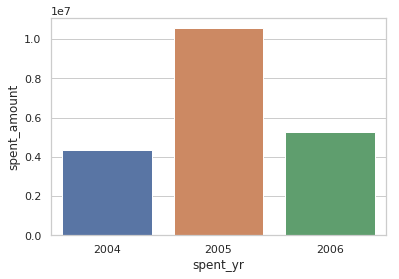

In [74]:
sns.barplot(x='spent_yr',y='spent_amount',data=s1)

As seen above :

* 2005 saw the highest spend on air tickets followed by 2006 & 2004 in order.

### 4.c

In [81]:
df4=alpha_data[['Type','spent_amount']]
df4['spent_mo']=alpha_data['spent_month'].apply(lambda u:u.month)
df4.reset_index(drop=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Type,spent_amount,spent_mo
0,JEWELLERY,485470.80,1
1,CLOTHES,476702.09,2
2,TRAIN TICKET,394970.96,1
3,TRAIN TICKET,176372.82,4
4,FOOD,155611.91,2
5,RENTAL,244534.68,10
6,MOVIE TICKET,344372.10,8
7,PETRO,183839.61,11
8,AIR TICKET,346925.68,4
9,BUS TICKET,361141.31,5


In [82]:
df5=df4.groupby(('Type','spent_mo')).agg({'spent_amount':sum})
df5.reset_index(inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


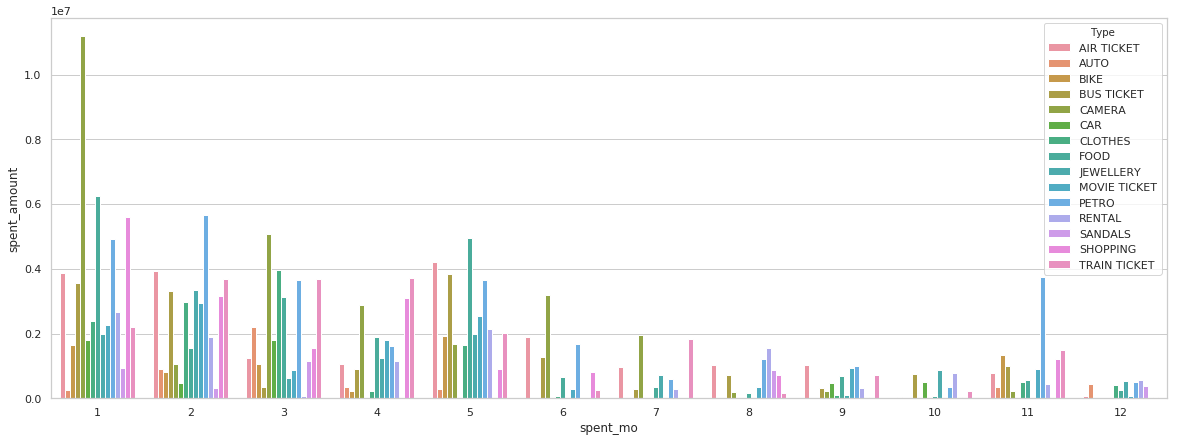

In [83]:
plt.figure(figsize=(20,7))
ax=sns.barplot(x='spent_mo',y='spent_amount',hue='Type',data=df5)

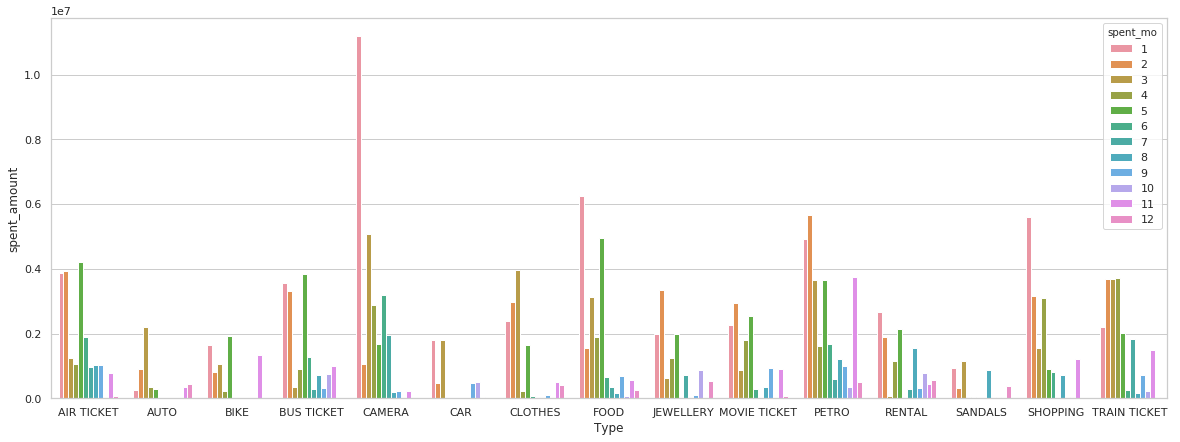

In [84]:
plt.figure(figsize=(20,7))
ax=sns.barplot(x='Type',y='spent_amount',hue='spent_mo',data=df5)

From the first plot, we see that :

* Customer spendings in GENERAL is HIGH during the first 2 quarters of the year (Jan-Mar & Apr-May)

* Post the month of May, with start of 3rd quarter, the spendings start to decrease, with a exception of Nov, where spendings marginally increase.

From the secong plot, we infer that :

* Spending on air tickets is high with begining of NEW YEAR (1st 2 months of new year), then during 2nd quarter.

* Spending on Petrol remains stable for most of the year, with a dip during 3rd quarter and year end.

* Spending on Camera remains high for first 3 quartes.

* Spending on Clothes increases with begining of NEW YEAR.

### 5.

In [85]:
def cust_finder(p,t):      #UDF
    
    df=alpha_data[['City','Product','repay_amount']].copy()
    df['yr']=alpha_data.repay_month.apply(lambda g:g.year)
    
    for c in list(df.City.unique()):
        r_df=df[(df.Product==p)&(df.yr==t)&(df.City==c)].repay_amount.sort_values(ascending=False)
        print('\nIn ',c, ' : Top 10 Customers with Product',p, ' are')
        print(r_df.reset_index().iloc[0:10])
        
print("Enter product category (Gold / Silver / Platimum) :")  #note : platinum is mispelled as PLATIMUM in the database
a=input()
print("Enter desired year (2004 / 2005 / 2006) :")
b=int(input())
cust_finder(a,b)

Enter product category (Gold / Silver / Platimum) :
Gold
Enter desired year (2004 / 2005 / 2006) :
2005

In  BANGALORE  : Top 10 Customers with Product Gold  are
  Customer  repay_amount
0      A43     490814.79
1      A43     484212.27
2      A13     464781.64
3      A13     462058.63
4      A43     454364.16
5      A13     444905.55
6      A13     439763.88
7      A43     415860.27
8       A1     402099.78
9      A30     398904.74

In  CALCUTTA  : Top 10 Customers with Product Gold  are
  Customer  repay_amount
0      A60     470905.99
1      A31     454736.04
2      A31     449928.27
3      A60     442888.86
4      A31     438848.56
5      A15     433112.39
6      A10     424254.68
7      A60     392510.50
8      A60     380378.98
9      A60     367052.39

In  COCHIN  : Top 10 Customers with Product Gold  are
  Customer  repay_amount
0      A61     494436.86
1      A61     483148.94
2      A45     482338.57
3      A45     465097.84
4      A61     455414.03
5      A11     442370.14
6